In [68]:
import torch
import os
import matplotlib.pyplot as plt
import math
import numpy as np

In [69]:
batch_size = 64

In [70]:
prefix_dir = './analysis/cifar100_101_{0}'.format(batch_size)

In [71]:
models = set([d.split('_')[0] for d in sorted(os.listdir(prefix_dir))])

In [82]:
models -= set(['zerocenter2', 'doublenorm', 'doublenorm2', 'norm2'])

In [83]:
models

{'norm', 'zerocenter'}

In [84]:
def get_stats(model):
    train_log_loss = []
    test_log_loss = []
    train_acc = []
    test_acc = []
    
    for d in os.listdir(prefix_dir):
        if model == d.split('_')[0]:
            file_path = os.path.join(prefix_dir, d, 'stats.pth')
            stat = torch.load(file_path)
            
            train_log_loss.append(np.array([math.log(row[0]) for row in stat['train']]))
            train_acc.append(np.array([row[1] for row in stat['train']]))
            test_log_loss.append(np.array([math.log(row[0]) for row in stat['test']]))
            test_acc.append(np.array([row[1] for row in stat['test']]))
            
    train_log_loss = np.stack(train_log_loss).mean(0)
    train_acc = np.stack(train_acc).mean(0)
    test_log_loss = np.stack(test_log_loss).mean(0)
    test_acc = np.stack(test_acc).mean(0)
    
    return train_log_loss, train_acc, test_log_loss, test_acc

In [85]:
train_log_loss = {}
test_log_loss = {}
train_acc = {}
test_acc = {}

for m in models:
    train_log_loss[m], train_acc[m], test_log_loss[m], test_acc[m] = get_stats(m)

In [86]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']

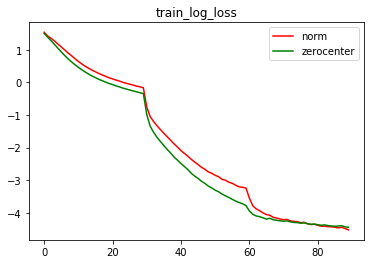

In [87]:
for c, m in zip(colors, train_log_loss):
    plt.plot(train_log_loss[m], color=c, label=m)
plt.title('train_log_loss')
plt.legend()

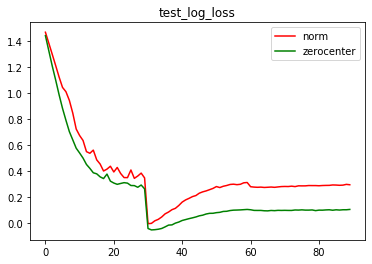

In [88]:
for c, m in zip(colors, test_log_loss):
    plt.plot(test_log_loss[m], color=c, label=m)
plt.title('test_log_loss')
plt.legend()

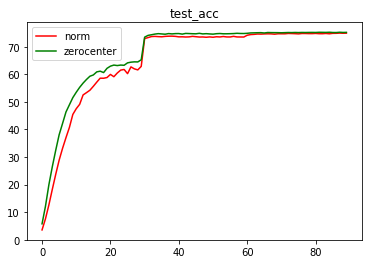

In [89]:
for c, m in zip(colors, test_acc):
    plt.plot(test_acc[m], color=c, label=m)
plt.title('test_acc')
plt.legend()

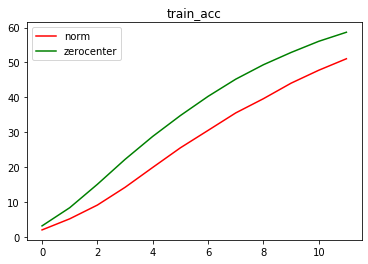

In [100]:
for c, m in zip(colors, train_acc):
    plt.plot(train_acc[m][:12], color=c, label=m)
plt.title('train_acc')
plt.legend()

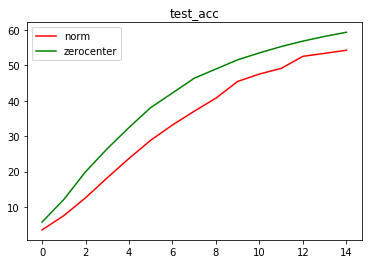

In [105]:
for c, m in zip(colors, test_acc):
    plt.plot(test_acc[m][:15], color=c, label=m)
plt.title('test_acc')
plt.legend()

In [123]:
np.exp(train_log_loss[m][:22])

array([4.45688412, 4.00336618, 3.59583458, 3.20594007, 2.85217904,
       2.54144651, 2.27868921, 2.05586158, 1.8723746 , 1.71715955,
       1.58304379, 1.46954567, 1.37412351, 1.28771022, 1.21415797,
       1.15338456, 1.09579581, 1.04995218, 1.00559587, 0.96414158,
       0.93340161, 0.89503449])